# Basic Integrated Rigid-Origami Demonstrator (B.I.R.D)

### The following is a code developed as part of a Group Design Project at the University of Southampton to model parameters of rigid origami folds and study their kinematics.

#### The code takes the inputs of the global geomtery of the fold, the desired number of rows and columns within the Miura Ori fold as well as the expected differnetial in angle between the sides of the fold under deformation.

#### Authors: Michael Firth, Dennis Burnham, Anna Peters, Matthew Beckett, Stephanie Coles, Jordan Greener


Import the relevant external python libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import trusspy as tp
%matplotlib qt5

Define Input Dictionaries

In [2]:
global_geometry = {'n_columns':20, 'n_rows':20, 'g_width':200, 'g_depth':200, 'g_height':20}

global_geometry = {'n_columns':20, 'n_rows':20, 'g_width':200, 'g_depth':200, 'g_height':20}


differential_angle = 5
V_L_ratio = 0.8
K_fold_K_facet_ratio = 1
E = 10.5

n_unit_cells = global_geometry['n_columns']*global_geometry['n_rows']

cell_coord = np.zeros([global_geometry['n_columns'], global_geometry['n_rows']])

i=0
for j in range(global_geometry['n_columns']):
    for k in range(global_geometry['n_rows']):
        cell_coord[j][k] = i
        i = i+1

Calculate Poisson's Ratio for given specific input

In [5]:
#v_sl = (- S/L)*((1-np.cos(differential_angle)/np.sin(differential_angle)))
#print(v_sl)

-1.2958129155327456


Cycle through different combinations of number of rows 

In [6]:
"""H_i_row = []
S_i_row = []
L_i_row  = []
V_i_row  = []
L0_i_row  = [] 
S0_i_row  = []
V0_i_row  = []
theta_i_row  = []
gamma_i_row  = []
H_i = []
S_i= []
L_i = []
V_i  = []
L0_i  = [] 
S0_i  = []
V0_i  = []
theta_i  = []
gamma_i = []
v_sl_i_row = []
v_sl_i_col = []
Z = []
X = []

for i in range(200):
    H_i_row.append(global_height)
    S_i_row.append(global_width/(2*(n_columns)))
    L_i_row.append(global_depth/(2*(i+1)))
    V_i_row.append(L*V_L_ratio)
    L0_i_row.append((H_i_row[i]**2 + (L_i_row[i])**2)**0.5)
    S0_i_row.append(((H_i_row[i]**2*V_i_row[i]**2)/(H_i_row[i]**2 + L_i_row[i]**2)+S_i_row[i]**2)**0.5)
    V0_i_row.append((L_i_row[i]*V_i_row[i])/((H_i_row[i]**2+L_i_row[i]**2)**0.5))
    theta_i_row.append(np.arctan(H_i_row[i]/L_i_row[i]))
    gamma_i_row.append(np.arctan(S0_i_row [i]/V0_i_row [i]))

    v_sl_i_row.append((- S_i_row[i]/L_i_row[i])*((1-np.cos((differential_angle))/np.sin((differential_angle)))))
     
    for i in range(50):
        H_i.append(global_height)
        S_i.append(global_width/(2*(i+1)))
        L_i.append(global_depth/(2*(20)))
        V_i.append(L*V_L_ratio)
        L0_i.append((H_i[i]**2 + (L_i[i])**2)**0.5)
        S0_i.append(((H_i[i]**2*V_i[i]**2)/(H_i[i]**2 + L_i[i]**2)+S_i[i]**2)**0.5)
        V0_i.append((L_i[i]*V_i[i])/((H_i[i]**2+L_i[i]**2)**0.5))
        theta_i.append(np.arctan(H_i[i]/L_i[i]))
        gamma_i.append(np.arctan(S0_i[i]/V0_i[i]))
        Z.append(L0_i[i]/S0_i[i])
        X.append(theta_i[i]/gamma_i[i])

        v_sl_i_col.append((- S_i[i]/L_i[i])*((1-np.cos((differential_angle))/np.sin((differential_angle)))))"""

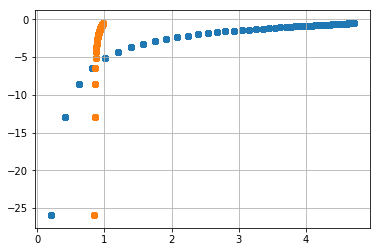

In [7]:
#plt.scatter( np.degrees(theta_i), v_sl_i)
#plt.scatter( np.degrees(gamma_i), v_sl_i_row)
#plt.scatter( np.degrees(theta_i), v_sl_i)
#plt.scatter( L0_i_row, v_sl_i_row)
#plt.scatter(Z, v_sl_i_col)
#plt.scatter( X, v_sl_i_col)
#plt.grid(which='major')
#f=np.arange(0,5)
#X_arr = np.array(X)
#Z_arr = np.array(Z)
#idx=np.argwhere(np.diff(np.sign(X_arr-Z_arr))).flatten()
#print(idx)
#print(f[3])
#print(X[3])
#plt.scatter(X[3], 'ro')
#plt.scatter( V0_i, v_sl_i)
#plt.scatter( range(len(v_sl_i_row)), v_sl_i_row)
#plt.scatter( range(len(v_sl_i_col)), v_sl_i_col)

Define Cell Coordinate Matrix

In [8]:
n_unit_cells = n_rows*n_columns

cell_coord = np.zeros(global_geometry['n_columns'], global_geometry['n_rows']])

i=0
for j in range(n_columns):
    for k in range(n_rows):
        cell_coord[j][k] = i
        i = i+1

Define Waveform class

In [9]:
class Waveform:
    def __init__(self ):

SyntaxError: unexpected EOF while parsing (<ipython-input-9-be7889909032>, line 2)

Define Miura Ori Unit Cell Class

In [15]:
class MO_unit_cell:
    def __init__(self, global_geometry, V_L_ratio=0.8, cell_number=0):
        """Define cell number"""
        self.cell_n = cell_number
        
        """Define Cell Geometry"""
        self.H = global_geometry['g_height']
        self.S = global_geometry['g_width']/(2*(global_geometry['n_rows']))
        self.L = global_geometry['g_depth']/(2*(global_geometry['n_columns'])) 
        self.V = self.L*V_L_ratio
        
        """Define Cell Net geometry"""
        self.L0 = (self.H**2 + self.L**2)**0.5
        self.S0 = ((((self.H**2)*(self.V**2))/(self.H**2 + self.L**2))+self.S**2)**0.5
        self.V0 = (self.L*self.V)/((self.H**2+self.L**2)**0.5)
        self.theta = np.arctan(self.H/self.L)
        self.gamma = np.arctan(self.S0/self.V0)
        
        """Define cell location"""
        self.x_coord = np.where(cell_coord == self.cell_n)[1][0]
        self.y_coord = np.where(cell_coord == self.cell_n)[0][0]
        
        """ Define unit cell node locations """
        self.node_coord = np.zeros([9,3])
        self.node_coord[0][0] = 0 + self.x_coord*2*self.S
        self.node_coord[0][1] = 0 + self.y_coord*2*self.L
        self.node_coord[0][2] = 0
        self.node_coord[1][0] = self.node_coord[0][0] + self.S
        self.node_coord[1][1] = self.node_coord[0][1] + self.V
        self.node_coord[1][2] = self.node_coord[0][2] + 0
        self.node_coord[2][0] = self.node_coord[0][0] + 2*self.S
        self.node_coord[2][1] = self.node_coord[0][1] + 0
        self.node_coord[2][2] = self.node_coord[0][2] + 0 
        self.node_coord[3][0] = self.node_coord[0][0] + 0 
        self.node_coord[3][1] = self.node_coord[0][1] + self.L
        self.node_coord[3][2] = self.node_coord[0][2] + self.H
        self.node_coord[4][0] = self.node_coord[0][0] + self.S
        self.node_coord[4][1] = self.node_coord[0][1] + self.L+self.V#-(L0**2-H**2)**0.5
        self.node_coord[4][2] = self.node_coord[0][2] + self.H
        self.node_coord[5][0] = self.node_coord[0][0] + 2*self.S
        self.node_coord[5][1] = self.node_coord[0][1] + self.L
        self.node_coord[5][2] = self.node_coord[0][2] + self.H
        self.node_coord[6][0] = self.node_coord[0][0] + 0 
        self.node_coord[6][1] = self.node_coord[0][1] + 2*self.L
        self.node_coord[6][2] = self.node_coord[0][2] + 0 
        self.node_coord[7][0] = self.node_coord[0][0] + self.S
        self.node_coord[7][1] = self.node_coord[0][1] + 2*self.L+self.V
        self.node_coord[7][2] = self.node_coord[0][2] + 0 
        self.node_coord[8][0] = self.node_coord[0][0] + 2*self.S
        self.node_coord[8][1] = self.node_coord[0][1] + 2*self.L
        self.node_coord[8][2] = self.node_coord[0][2] + 0 
    
        """ Define unit cell connectivity """
        self.node_fold_elements = np.zeros([12, 2])
        self.node_fold_elements[0][0] = 0
        self.node_fold_elements[0][1] = 1
        self.node_fold_elements[1][0] = 1
        self.node_fold_elements[1][1] = 2
        self.node_fold_elements[2][0] = 0
        self.node_fold_elements[2][1] = 3
        self.node_fold_elements[3][0] = 1
        self.node_fold_elements[3][1] = 4
        self.node_fold_elements[4][0] = 2
        self.node_fold_elements[4][1] = 5
        self.node_fold_elements[5][0] = 3
        self.node_fold_elements[5][1] = 4
        self.node_fold_elements[6][0] = 4
        self.node_fold_elements[6][1] = 5
        self.node_fold_elements[7][0] = 3
        self.node_fold_elements[7][1] = 6
        self.node_fold_elements[8][0] = 4
        self.node_fold_elements[8][1] = 7
        self.node_fold_elements[9][0] = 5
        self.node_fold_elements[9][1] = 8
        self.node_fold_elements[10][0] = 6
        self.node_fold_elements[10][1] = 7
        self.node_fold_elements[11][0] = 7
        self.node_fold_elements[11][1] = 8

        """ Define node facet elements """
        self.node_facet_elements = np.zeros([4, 2])
        self.node_facet_elements[0][0]  = 4
        self.node_facet_elements[0][1]  = 0
        self.node_facet_elements[1][0]  = 4
        self.node_facet_elements[1][1]  = 2
        self.node_facet_elements[2][0]  = 4
        self.node_facet_elements[2][1]  = 6
        self.node_facet_elements[3][0]  = 4
        self.node_facet_elements[3][1]  = 8
        
        """Define facet element stiffness"""
        self.K_facet = (E*1)/(((((self.node_coord[int(self.node_facet_elements[0][0])][0]-self.node_coord[int(self.node_facet_elements[0][1])][0])**2)+
                                        (self.node_coord[int(self.node_facet_elements[0][0])][1]-self.node_coord[int(self.node_facet_elements[0][1])][1])**2)+
                                        (self.node_coord[int(self.node_facet_elements[0][0])][2]-self.node_coord[int(self.node_facet_elements[0][1])][2])**2))**0.5

        """Define fold element stiffness"""
        self.K_fold = self.K_facet*K_fold_K_facet_ratio

        """Define node displacement"""
        self.node_disp = np.zeros([9,3])
        
        """Define unit cell net"""
        self.net_coord = np.zeros([9,3])
        self.net_coord[0][0] = 0 + self.x_coord*(2*self.S0)
        self.net_coord[0][1] = 0 + self.y_coord*(2*self.L0)
        self.net_coord[0][2] = 0
        self.net_coord[1][0] = self.net_coord[0][0] + self.S0
        self.net_coord[1][1] = self.net_coord[0][1] + self.V0
        self.net_coord[1][2] = self.net_coord[0][2] + 0
        self.net_coord[2][0] = self.net_coord[0][0] + 2*self.S0
        self.net_coord[2][1] = self.net_coord[0][1] + 0
        self.net_coord[2][2] = self.net_coord[0][2] + 0 
        self.net_coord[3][0] = self.net_coord[0][0] + 0 
        self.net_coord[3][1] = self.net_coord[0][1] + self.L0
        self.net_coord[3][2] = self.net_coord[0][2] + 0
        self.net_coord[4][0] = self.net_coord[0][0] + self.S0
        self.net_coord[4][1] = self.net_coord[0][1] + self.L0+self.V0
        self.net_coord[4][2] = self.net_coord[0][2] + 0
        self.net_coord[5][0] = self.net_coord[0][0] + 2*self.S0
        self.net_coord[5][1] = self.net_coord[0][1] + self.L0
        self.net_coord[5][2] = self.net_coord[0][2] + 0
        self.net_coord[6][0] = self.net_coord[0][0] + 0 
        self.net_coord[6][1] = self.net_coord[0][1] + 2*self.L0
        self.net_coord[6][2] = self.net_coord[0][2] + 0 
        self.net_coord[7][0] = self.net_coord[0][0] + self.S0
        self.net_coord[7][1] = self.net_coord[0][1] + 2*self.L0+self.V0
        self.net_coord[7][2] = self.net_coord[0][2] + 0 
        self.net_coord[8][0] = self.net_coord[0][0] + 2*self.S0
        self.net_coord[8][1] = self.net_coord[0][1] + 2*self.L0
        self.net_coord[8][2] = self.net_coord[0][2] + 0 

In [11]:
class Texture:
    def __init__(self, n_cell_types, unit_cell_and_coords={'MO':np.zeros(global_geometry['n_columns'], global_geometry['n_rows'])}):
        

SyntaxError: unexpected EOF while parsing (<ipython-input-11-30332f99b4bb>, line 2)

In [ ]:
class Kinematics:
    def __init__(self, n_cell_types, unit_cell_and_coords={'MO':np.zeros(global_geometry['n_columns'], global_geometry['n_rows'])}):

Create the dictionary of unit cells corrisponding to the overall texture

In [13]:
cells_dict = {}
for k in range(n_unit_cells):
    cells_dict['MO_unit_cell_{}'.format(k)] = MO_unit_cell(global_geometry, cell_number=k)

Plot the nodes, fold elements and facet elements

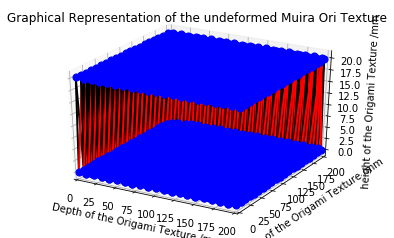

In [14]:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.set_xlabel("Depth of the Origami Texture /mm")
ax.set_ylabel("Width of the Origami Texture /mm")
ax.set_zlabel("height of the Origami Texture /mm")
ax.set_title("Graphical Representation of the undeformed Muira Ori Texture")
ax.set_xlim(0,200)
ax.set_ylim(0,200)

for j in range(n_unit_cells):
    for i in range(len( cells_dict['MO_unit_cell_{}'.format(j)].node_coord)):
        x = cells_dict['MO_unit_cell_{}'.format(j)].node_coord[i][0]
        y = cells_dict['MO_unit_cell_{}'.format(j)].node_coord[i][1]
        z = cells_dict['MO_unit_cell_{}'.format(j)].node_coord[i][2]
        ax.scatter(x, y, z, s=50, c='b', depthshade=False)
        

    for i in range(len(cells_dict['MO_unit_cell_{}'.format(j)].node_fold_elements)):
        node_0 = int(cells_dict['MO_unit_cell_{}'.format(j)].node_fold_elements[i][0])
        node_1 = int(cells_dict['MO_unit_cell_{}'.format(j)].node_fold_elements[i][1])
        xe = [cells_dict['MO_unit_cell_{}'.format(j)].node_coord[node_0][0], cells_dict['MO_unit_cell_{}'.format(j)].node_coord[node_1][0]]
        ye = [cells_dict['MO_unit_cell_{}'.format(j)].node_coord[node_0][1], cells_dict['MO_unit_cell_{}'.format(j)].node_coord[node_1][1]]
        ze = [cells_dict['MO_unit_cell_{}'.format(j)].node_coord[node_0][2], cells_dict['MO_unit_cell_{}'.format(j)].node_coord[node_1][2]]
        ax.plot(xe, ye, ze, 'k', linewidth=2)

    for i in range(len(cells_dict['MO_unit_cell_{}'.format(j)].node_facet_elements)):
        node_0 = int(cells_dict['MO_unit_cell_{}'.format(j)].node_facet_elements[i][0])
        node_1 = int(cells_dict['MO_unit_cell_{}'.format(j)].node_facet_elements[i][1])
        xe = [cells_dict['MO_unit_cell_{}'.format(j)].node_coord[node_0][0], cells_dict['MO_unit_cell_{}'.format(j)].node_coord[node_1][0]]
        ye = [cells_dict['MO_unit_cell_{}'.format(j)].node_coord[node_0][1], cells_dict['MO_unit_cell_{}'.format(j)].node_coord[node_1][1]]
        ze = [cells_dict['MO_unit_cell_{}'.format(j)].node_coord[node_0][2], cells_dict['MO_unit_cell_{}'.format(j)].node_coord[node_1][2]]
        ax.plot(xe, ye, ze, 'r', linewidth=2)


Plot the Muira ori net

In [ ]:
#fig2 = plt.figure()

plt.xlabel("Depth of the Origami Net /mm")
plt.ylabel("Width of the Origami Net /mm")
plt.title("Graphical Representation of the Muira Ori Net")
#fig2.set_xlim(0,200)
#fig2.set_ylim(0,200)

for j in range(n_unit_cells):
    for i in range(len( cells_dict['unit_cell_{}'.format(j)].net_coord)):
        x = cells_dict['unit_cell_{}'.format(j)].net_coord[i][0]
        y = cells_dict['unit_cell_{}'.format(j)].net_coord[i][1]
        plt.scatter(x, y, s=50, c='b')
        

    for i in range(len(cells_dict['unit_cell_{}'.format(j)].node_fold_elements)):
        node_0 = int(cells_dict['unit_cell_{}'.format(j)].node_fold_elements[i][0])
        node_1 = int(cells_dict['unit_cell_{}'.format(j)].node_fold_elements[i][1])
        xe = [cells_dict['unit_cell_{}'.format(j)].net_coord[node_0][0], cells_dict['unit_cell_{}'.format(j)].net_coord[node_1][0]]
        ye = [cells_dict['unit_cell_{}'.format(j)].net_coord[node_0][1], cells_dict['unit_cell_{}'.format(j)].net_coord[node_1][1]]
        plt.plot(xe, ye, 'k', linewidth=2)



Find the jacobian for the facets

In [ ]:
a = np.zeros([3,1])
b = np.zeros([3,1])
c = np.zeros([3,1])

for i in range(3):
    a[i] = cells_dict['unit_cell_0'].node_coord[2][i] - cells_dict['unit_cell_0'].node_coord[4][i]
    b[i] = cells_dict['unit_cell_0'].node_coord[5][i] - cells_dict['unit_cell_0'].node_coord[4][i]
    c[i] = cells_dict['unit_cell_0'].node_coord[1][i] - cells_dict['unit_cell_0'].node_coord[4][i]

kappa = np.arccos((np.tensordot(a,b))/(np.linalg.norm(a)*np.linalg.norm(b)))
epsilon = np.arccos((np.tensordot(a,c))/(np.linalg.norm(a)*np.linalg.norm(c)))

F = (1/(np.sin(kappa)*np.sin(epsilon)))*(1/((np.linalg.norm(a)**3)*(np.linalg.norm(b))*(np.linalg.norm(c))))*np.tensordot((np.cross(a,(np.cross(c,a,axis=0)),axis=0)),(np.cross(a,b,axis=0)))

In [ ]:
a, b, c


In [ ]:
np.degrees(epsilon)


In [ ]:
F

In [ ]:
np.degrees(np.arcsin(F))
